In [433]:
#pip install openpyxl

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn import datasets
from matplotlib import font_manager, rc
import openpyxl

In [435]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [436]:
data_2020=pd.read_csv('real/신한카드 데이터/KCTI_NATIVE_2020.txt',sep="|",encoding='cp949')

In [437]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566988 entries, 0 to 5566987
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       int64  
 7   ta_ym           int64  
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             float64
 11  usec            int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 509.7+ MB


In [438]:
data_2020.head(5)

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,경기,세종,.,취미오락,유흥,M,40,202001,RED,휴식,6410700.0,45
1,경남,세종,.,스포츠활동,레저스포츠,M,30,202001,RED,활동,147900.0,15
2,광주,세종,.,취미오락,패션쇼핑,M,30,202001,RED,휴식,793050.0,5
3,인천,세종,.,취미오락,인터넷게임,M,30,202001,RED,취침,10200.0,10
4,경기,세종,.,취미오락,유흥,M,40,202001,RED,취침,382500.0,5


In [439]:
db=data_2020[data_2020['gb3']=='여행']

## 월별로 나눠보기

In [466]:
db_1=db[db['ta_ym']==202006]

In [467]:
db_1.head(3)

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
4606231,울산,울산,북구,여행,숙박,M,20,202006,RED,활동,4986849,178
4606320,경기,부산,중구,여행,체험,F,20,202006,WHITE,활동,388360,10
4606321,부산,부산,중구,여행,체험,F,20,202006,RED,휴식,515088,15


In [468]:
len(db_1)

118231

## 계산위해 float-> int로 변환

In [469]:
db['vlm']=db['vlm'].astype(int)

<ipython-input-469-f3a7a37fdc05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['vlm']=db['vlm'].astype(int)


In [470]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679483 entries, 14 to 5566987
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   v1              679483 non-null  object
 1   v2              679483 non-null  object
 2   v3              679483 non-null  object
 3   gb3             679483 non-null  object
 4   gb2             679483 non-null  object
 5   sex_ccd         679483 non-null  object
 6   cln_age_r       679483 non-null  int64 
 7   ta_ym           679483 non-null  int64 
 8   daw_ccd_r       679483 non-null  object
 9   apv_ts_dl_tm_r  679483 non-null  object
 10  vlm             679483 non-null  int32 
 11  usec            679483 non-null  int64 
dtypes: int32(1), int64(3), object(8)
memory usage: 84.8+ MB


In [471]:
tb=db_1['v2'].groupby(db['vlm'])

In [472]:
tb

In [473]:
tb=db_1.groupby(['v2'])['vlm'].sum()

In [474]:
len(tb)

17

In [475]:
tb

v2
강원    3.441251e+10
경기    5.961206e+10
경남    1.247041e+10
경북    1.070083e+10
광주    3.409783e+09
대구    5.742661e+09
대전    1.107134e+11
부산    3.516129e+10
서울    1.971731e+11
세종    3.868030e+08
울산    3.339165e+09
인천    1.687647e+10
전남    1.265928e+10
전북    7.393768e+09
제주    8.023684e+10
충남    1.060588e+10
충북    6.978600e+09
Name: vlm, dtype: float64

In [476]:
f1=tb.sort_values()

In [477]:
f1

v2
세종    3.868030e+08
울산    3.339165e+09
광주    3.409783e+09
대구    5.742661e+09
충북    6.978600e+09
전북    7.393768e+09
충남    1.060588e+10
경북    1.070083e+10
경남    1.247041e+10
전남    1.265928e+10
인천    1.687647e+10
강원    3.441251e+10
부산    3.516129e+10
경기    5.961206e+10
제주    8.023684e+10
대전    1.107134e+11
서울    1.971731e+11
Name: vlm, dtype: float64

<AxesSubplot:title={'center':'20년도 6월 합산 금액'}, ylabel='v2'>

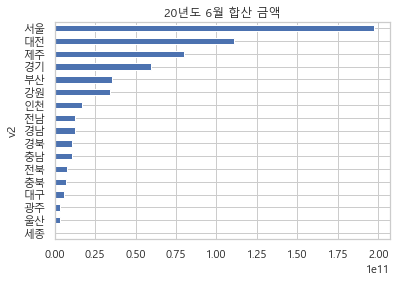

In [478]:
f1.plot(kind="barh",title="20년도 6월 합산 금액")

# 지역면적?

In [479]:
ttang=pd.read_csv('real/gookmin/도시지역면적_시도_시_군_구__20200806143531.csv',encoding='cp949')

In [480]:
ttang.head()

,행정구역별,2016,2017,2018
0,전국,17609.52,17635.88,17788.93
1,서울특별시,606.11,605.60,605.57
2,부산광역시,940.83,940.83,940.83
3,대구광역시,797.97,798.00,797.92
4,인천광역시,580.15,580.14,579.74


In [481]:
ttang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   18 non-null     object 
 1   2016    18 non-null     float64
 2   2017    18 non-null     float64
 3   2018    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [482]:
#나름 최근 분류-필요없는 전국 나누고
td=ttang.drop(ttang[ttang.행정구역별=='전국'].index)

In [483]:
td

,행정구역별,2016,2017,2018
1,서울특별시,606.11,605.60,605.57
2,부산광역시,940.83,940.83,940.83
3,대구광역시,797.97,798.00,797.92
4,인천광역시,580.15,580.14,579.74
5,광주광역시,481.55,480.05,480.05
6,대전광역시,495.55,495.55,495.82
7,울산광역시,755.55,755.55,755.55
8,세종특별자치시,140.97,141.47,142.72
9,경기도,3367.49,3371.08,3376.01
10,강원도,1027.20,1027.23,1028.78


In [484]:
td=td[['행정구역별','2018']]

In [485]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   17 non-null     object 
 1   2018    17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


In [486]:
td.head(3)

,행정구역별,2018
1,서울특별시,605.57
2,부산광역시,940.83
3,대구광역시,797.92


In [487]:
db['vlm']=db['vlm'].astype(int)

<ipython-input-487-f3a7a37fdc05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['vlm']=db['vlm'].astype(int)


In [488]:
td['2018']=td['2018'].astype(int)

<ipython-input-488-8f4015abc0ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['2018']=td['2018'].astype(int)


## 데이터 프레임화

In [489]:
tb

v2
강원    3.441251e+10
경기    5.961206e+10
경남    1.247041e+10
경북    1.070083e+10
광주    3.409783e+09
대구    5.742661e+09
대전    1.107134e+11
부산    3.516129e+10
서울    1.971731e+11
세종    3.868030e+08
울산    3.339165e+09
인천    1.687647e+10
전남    1.265928e+10
전북    7.393768e+09
제주    8.023684e+10
충남    1.060588e+10
충북    6.978600e+09
Name: vlm, dtype: float64

In [490]:
new=pd.DataFrame(tb)

In [491]:
new.to_excel('2006.xlsx')

## 합칠려고 변수명 변경

In [161]:
td['행정구역별']=['서울','부산','대구','인천','광주','대전','울산','세종',
            '경기','강원','충북','충남','전북','전남','경북','경남','제주']

<ipython-input-161-c887f048e13c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['행정구역별']=['서울','부산','대구','인천','광주','대전','울산','세종',


In [164]:
td.head()

,v2,2018
1,서울,605.57
2,부산,940.83
3,대구,797.92
4,인천,579.74
5,광주,480.05


In [163]:
td.rename(columns={"행정구역별":"v2"},inplace=True)

C:\Users\205\.conda\envs\rdata\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [187]:
new

,vlm
v2,
강원,-2147483648
경기,-2147483648
경남,-2147483648
경북,-2147483648
광주,-2147483648
대구,-2147483648
대전,-2147483648
부산,-2147483648
서울,-2147483648


In [186]:
new[0:1]

,vlm
v2,
강원,-2147483648


In [183]:
td['2018']=td['2018'].astype(int)
new['vlm']=new['vlm'].astype(int)

<ipython-input-183-903be43b005e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['2018']=td['2018'].astype(int)


In [173]:
result['2018']=result['2018'].astype(int)
result['vlm']=result['vlm'].astype(int)

,v2,2018
1,서울,605.57
2,부산,940.83
3,대구,797.92
4,인천,579.74
5,광주,480.05
6,대전,495.82
7,울산,755.55
8,세종,142.72
9,경기,3376.01
10,강원,1028.78


In [198]:
pd_2001=pd.read_excel('2001.xlsx')

# 결과물

In [200]:
pd_2001

,v2,vlm,2018
0,강원,193976756500,1028
1,경기,361324045745,3376
2,경남,69165437881,2007
3,경북,53219623676,1866
4,광주,19946565114,480
5,대구,35313670153,797
6,대전,642106708520,495
7,부산,198896979157,940
8,서울,1367464537376,605
9,세종,1851192273,142


<AxesSubplot:>

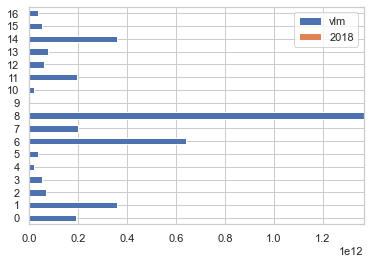

In [211]:
pd_2001[["vlm",2018]].plot(kind="barh",stacked=True)

<AxesSubplot:>

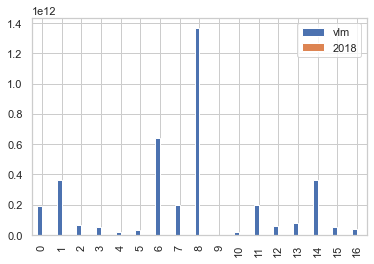

In [208]:
pd_2001.plot.bar()